# Breast cancer Wisconsin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

In [2]:
# Import cancer data

dataset = pd.read_csv('C:/Users/accel/cancer.csv')
X = dataset.iloc[:, 2:32].values # 從 radius_mean 開始作為資料集
Y = dataset.iloc[:, 0].values　# 將 diagnosis 作為 label

dataset.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print('cancer dataset dimensions:{}'.format(dataset.shape))

cancer dataset dimensions:(569, 32)


In [4]:
# Define the score

def TP():
    x = 0
    for i in range(len(Pred_test)):
        if Pred_test[i] == Y_test[i]:
            if Pred_test[i] == 'B':
                x += 1
    return x

def TN():
    x = 0
    for i in range(len(Pred_test)):
        if Pred_test[i] == Y_test[i]:
            if Pred_test[i] == 'M':
                x += 1
    return x

def FP():
    x = 0
    for i in range(len(Pred_test)):
        if Pred_test[i] != Y_test[i]:
            if Pred_test[i] == 'B':
                x += 1
    return x

def FN():
    x = 0
    for i in range(len(Pred_test)):
        if Pred_test[i] != Y_test[i]:
            if Pred_test[i] == 'M':
                x += 1
    return x

In [5]:
# 10 fold cross validation

KF = KFold(n_splits=10)

XtrainL = []
XtestL = []
YtrainL = []
YtestL = []
# split features
for X_train_index, X_test_index in KF.split(X): # X_train:X_test = 9:1, test依序從左至右
    X_train = X[X_train_index]
    X_test = X[X_test_index]
    XtrainL.append(X_train) # 儲存每次的訓練資料集
    XtestL.append(X_test) # 儲存每次的測試資料集
    
# split labels
for Y_train_index, Y_test_index in KF.split(Y):
    Y_train = Y[Y_train_index]
    Y_test = Y[Y_test_index]
    YtrainL.append(Y_train)
    YtestL.append(Y_test)

In [6]:
predL = []
precL = []
recL =[]
f1L = []

# 儲存10次驗證的準確率
for i in range(10):
    KNN = KNeighborsClassifier()
    KNN.fit(XtrainL[i], YtrainL[i]) # train
    
    Pred_test = KNN.predict(X_test) # Predict

    Precision = TP() / (TP() + FP()) # Scoring
    Recall = TP() / (TP() + FN())
    F1 = (2 * Precision * Recall) / (Precision + Recall)
    
    # store the scores
    predL.append(Pred_test)
    precL.append(round(Precision*100, 1))
    recL.append(round(Recall*100, 1))
    f1L.append(round(F1*100, 1))
    
print('Precision of test set:{}'.format(precL))
print('Recall of test set:{}'.format(recL))
print('F1-measure of test set:{}'.format(f1L))

Precision of test set:[97.7, 97.7, 97.7, 97.7, 97.7, 97.7, 97.7, 97.7, 97.7, 97.7]
Recall of test set:[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.7]
F1-measure of test set:[98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 97.7]


In [7]:
# change label into binary
for i in range(len(YtestL[9])):
    if YtestL[9][i] == 'M':
        YtestL[9][i] = 0
    elif YtestL[9][i] == 'B':
        YtestL[9][i] = 1
        
for i in range(len(predL[9])):
    if predL[9][i] == 'M':
        predL[9][i] = 0
    elif predL[9][i] == 'B':
        predL[9][i] = 1
        
# 為符合 roc_curve 的參數規格, 將 array 轉為　list
Y_true = list(YtestL[9])
Y_pred = list(predL[9])

print(Y_true)
print(Y_pred)

[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [8]:
fpr, tpr, threshold = roc_curve(Y_true, Y_pred, pos_label=1)

<Figure size 432x288 with 0 Axes>

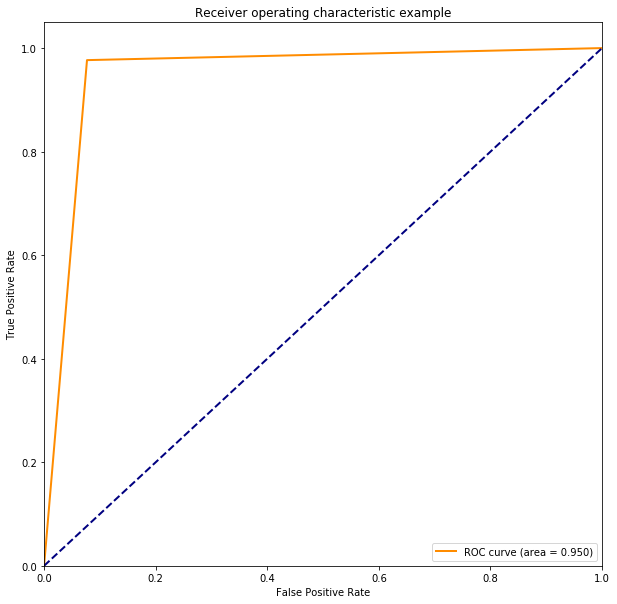

In [9]:
# roc curve & auc

roc_auc = auc(fpr,tpr) ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###FPR:row，TPR:column
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
 
plt.show()